<h1>
    Churn butter not customers
</h1>

In [1]:
import pandas as pd
import numpy as np
import os
import scipy.stats as stats

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

# Custom module imports
import acquire
import prepare
# import explore
# from model import score_models


<hr>

<h2>
    Planning
</h2>

- Create README.md with data dictionary, project and business goals, come up with initial hypotheses.
(half-started, not finished)
- Acquire data from the Codeup Database and create a function to automate this process. Save the function in an acquire.py file to import into the Final Report Notebook.
(DONE)
- Clean and prepare data for the first iteration through the pipeline, MVP preparation. Create a function to automate the process, store the function in a prepare.py module, and prepare data in Final Report Notebook by importing and using the funtion.
(DONE, mostly may need more target variables to work through)
- Clearly define two hypotheses, set an alpha, run the statistical tests needed, reject or fail to reject the Null Hypothesis, and document findings and takeaways.
(my two hypotheses will be when I find the heaviest weights in variables)
- Establish a baseline accuracy and document well.
- Train three different classification models.
- Evaluate models on train and validate datasets.
- Choose the model with that performs the best and evaluate that single model on the test dataset.
- Create csv file with the measurement id, the probability of the target values, and the model's prediction for each observation in my test dataset.
    Document conclusions, takeaways, and next steps in the Final Report Notebook.



<h2>
    Acquire
</h2>

In [2]:
telco = acquire.telco()
telco.head(5)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [3]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

<h2>
Prepare
</h2>

Split model into test train and split

In [4]:
train, validate, test = prepare.prep_telco_data(telco)
train, validate, test

(      gender  senior_citizen partner dependents  tenure phone_service  \
 6407  Female               0     Yes         No      72           Yes   
 2190    Male               0     Yes         No      17           Yes   
 1362  Female               0      No         No       7           Yes   
 5778  Female               0     Yes        Yes      56           Yes   
 4445  Female               0      No         No      42           Yes   
 ...      ...             ...     ...        ...     ...           ...   
 5260  Female               1      No        Yes       1           Yes   
 5332  Female               0      No         No      38           Yes   
 3695  Female               0      No        Yes      39            No   
 2711  Female               0      No         No       4           Yes   
 2081  Female               1     Yes         No      70           Yes   
 
         multiple_lines      online_security        online_backup  \
 6407               Yes                  

In [5]:
train.shape, validate.shape, test.shape

((281, 47), (1125, 47), (5626, 47))

<h2>
    Explore
</h2>

Text(0.5, 0, 'Churned')

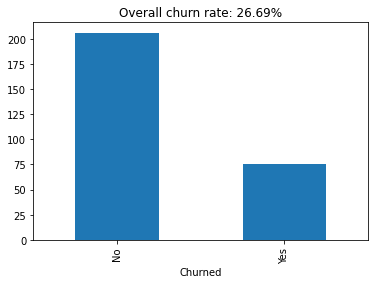

In [6]:
train.churn.value_counts().sort_index().plot.bar()
churn_rate = train.churn_encoded.mean()
plt.title(f"Overall churn rate: {churn_rate:.2%}")
plt.xlabel('Churned')

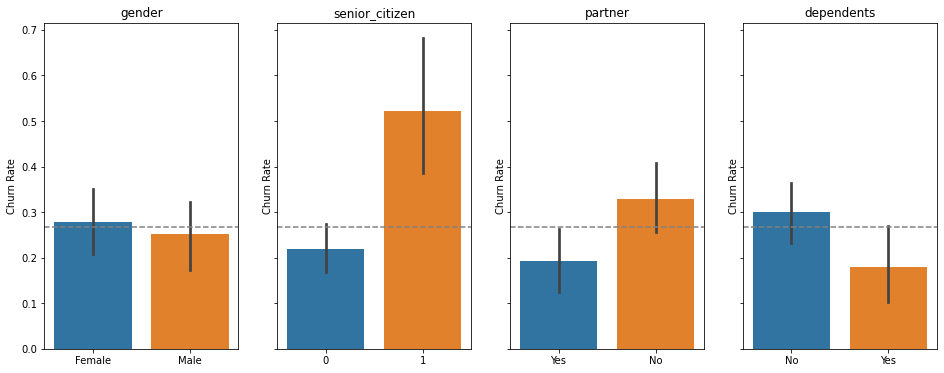

In [7]:
features = ['gender',
            'senior_citizen',
            'partner',
            'dependents',]

_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

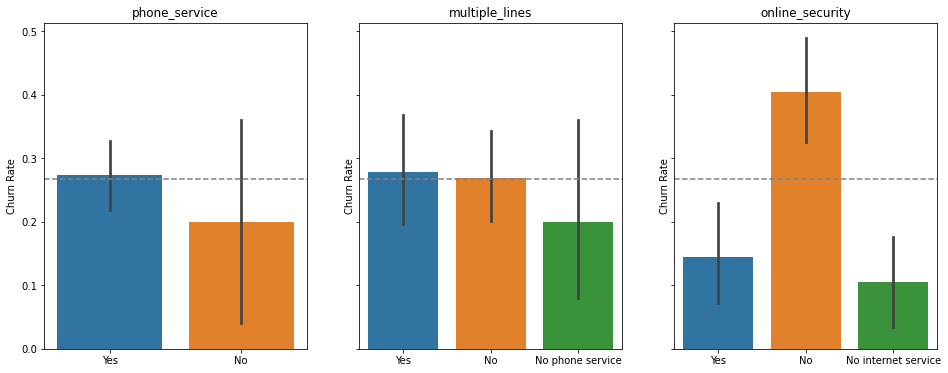

In [8]:
features = ['phone_service',
            'multiple_lines',
            'online_security']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

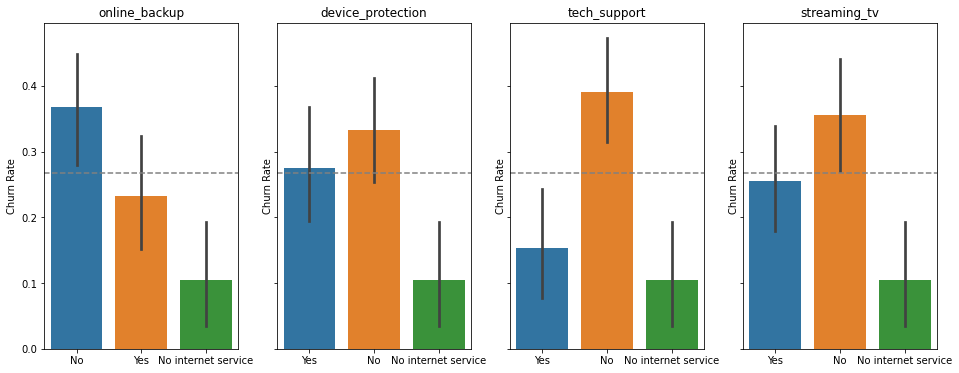

In [9]:
features = ['online_backup',
            'device_protection',
            'tech_support',
            'streaming_tv']

_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

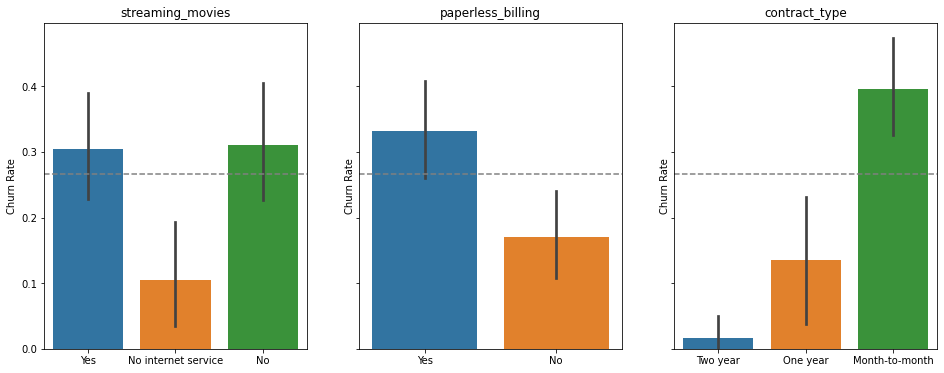

In [10]:
features = ['streaming_movies',
            'paperless_billing',
            'contract_type']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

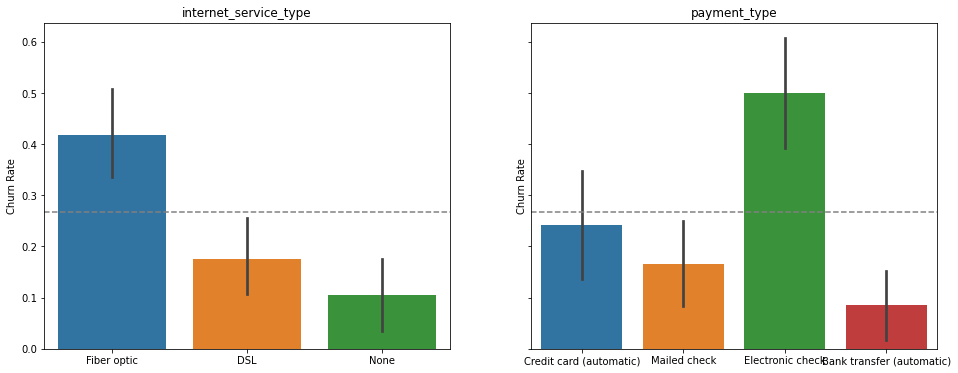

In [11]:
features = ['internet_service_type','payment_type']

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

Text(0, 0.5, 'Churn Rate')

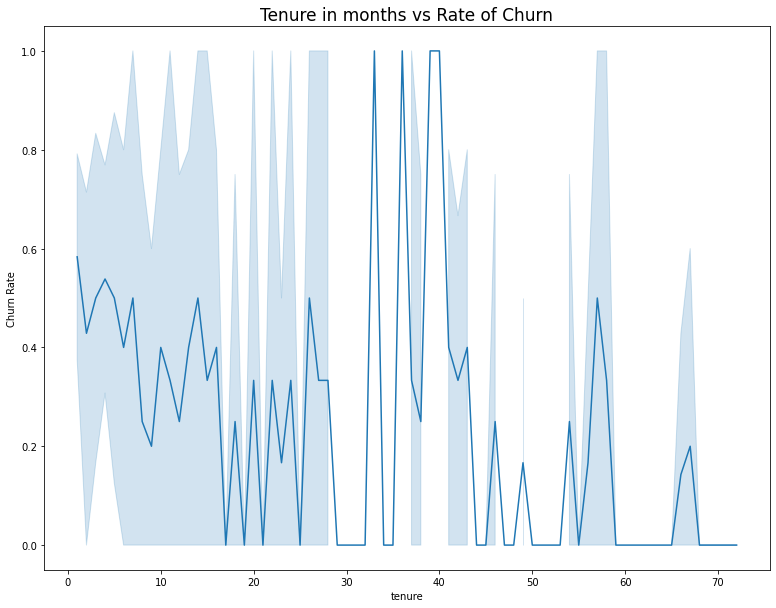

In [12]:
plt.figure('figure', figsize=(13, 10))
plt.title("Tenure in months vs Rate of Churn", fontsize=17)
ax = sns.lineplot(x="tenure", y="churn_encoded", data=train)
plt.ylabel('Churn Rate')

This about wraps up easily where I can get the most bang for my buck when it comes to the variables

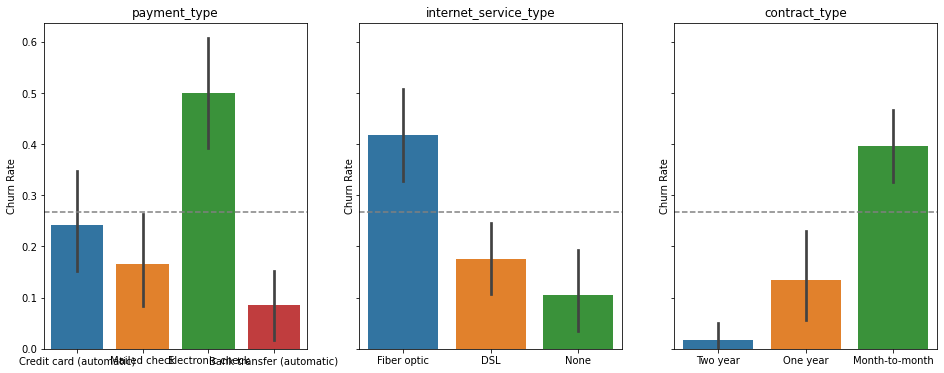

In [13]:
features = ['payment_type','internet_service_type','contract_type']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')
#this set of variables will be what I work through
#this is where i put my statistical stuff done

In [14]:
# subgroup
churned_electric_check_and_fiber = train.churn[(train.payment_type == 'Electronic check') & (train.internet_service_type == 'Fiber optic')]
#from here i cross tab because churn already a binary value
churned_electric_check_and_fiber.value_counts()

Yes    36
No     24
Name: churn, dtype: int64

In [15]:
electronic_check = train.churn[train.payment_type == 'Electronic check']
pd.crosstab(electronic_check, train.churn)

churn,No,Yes
churn,,
No,42,0
Yes,0,42


In [16]:
ctab = pd.crosstab(electronic_check, train.churn)
ctab

churn,No,Yes
churn,,
No,42,0
Yes,0,42


In [17]:
electronic_check

1362    Yes
3171    Yes
5301    Yes
4008     No
318     Yes
       ... 
6754     No
5177    Yes
2958     No
5260    Yes
2081     No
Name: churn, Length: 84, dtype: object

### take aways:
My targets are fiber internet, electronic checks, and month to month payers

<h2>
    Statistical Testing
</h2>

In [18]:
alpha = 0.05

## Modeling

in my models I am going to need to have so sort of accuracy for what my baseline will be

In [19]:
baseline_accuracy = (train[train['churn'] == 'No'].shape[0] / train.shape[0])
print(f'Baseline Accuracy: {baseline_accuracy:.2%}')

Baseline Accuracy: 73.31%


In [20]:
X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.telco_sample_splitter(train, validate, test)

In [21]:
tree = DecisionTreeClassifier(max_depth=4, random_state=123)
tree = tree.fit(X_train, y_train)

In [22]:
dt_in_sample_accuracy = tree.score(X_train, y_train)
dt_in_sample_accuracy
# dt_in_sample_accuracy = tree.score(X_train, y_train)
# round(dt_in_sample_accuracy, 2)

1.0

In [23]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [24]:
clf = clf.fit(X_train, y_train)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 6407 to 2081
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   tenure                                 281 non-null    int64
 1   gender_encoded                         281 non-null    int64
 2   partner_encoded                        281 non-null    int64
 3   dependents_encoded                     281 non-null    int64
 4   phone_service_encoded                  281 non-null    int64
 5   paperless_billing_encoded              281 non-null    int64
 6   churn_encoded                          281 non-null    int64
 7   multiple_lines_No phone service        281 non-null    uint8
 8   multiple_lines_Yes                     281 non-null    uint8
 9   online_security_No internet service    281 non-null    uint8
 10  online_security_Yes                    281 non-null    uint8
 11  online_backup_No internet se

In [25]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
6407,Female,0,Yes,No,72,Yes,Yes,Yes,No,Yes,...,1,0,1,0,1,1,0,1,0,0
2190,Male,0,Yes,No,17,Yes,No,Yes,Yes,No,...,0,0,1,1,0,0,0,0,0,1
1362,Female,0,No,No,7,Yes,No,No,No,No,...,0,0,1,0,0,1,0,0,1,0
5778,Female,0,Yes,Yes,56,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,0,0,1
4445,Female,0,No,No,42,Yes,No,Yes,Yes,Yes,...,0,0,1,1,0,0,0,1,0,0


In [26]:
X_train

,tenure,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
6407,72,1,1,0,1,1,0,0,1,0,...,1,0,1,0,1,1,0,1,0,0
2190,17,0,1,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1362,7,1,0,0,1,1,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5778,56,1,1,1,1,0,0,0,0,1,...,0,1,0,0,1,0,1,0,0,1
4445,42,1,0,0,1,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,1,1,0,1,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5332,38,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3695,39,1,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2711,4,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
y_train.value_counts().sum()

281

In [30]:
#Performance on In-Sample Data:
dt_in_sample_accuracy = tree.score(X_train, y_train)
round(dt_in_sample_accuracy, 2)
#.78

1.0

I see where the difference is a little closer now 
<br>
in my recreation notebook there are 4500 non-null values
<br>
while mine has 281, something not right
I think its in the explore page

In [32]:
# exploring time

In [37]:
irrelevant_features = ['gender_encoded', 'phone_service_encoded']

In [38]:
df_train = train.drop(columns=irrelevant_features)
df_validate = validate.drop(columns=irrelevant_features)
df_test = test.drop(columns=irrelevant_features)

In [39]:
columns_to_drop = ['customer_id','gender', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'contract_type', 'internet_service_type', 'payment_type','churn_encoded']
df_train_encoded = df_train.drop(columns=columns_to_drop)
df_validate_encoded = df_validate.drop(columns=columns_to_drop)
df_test_encoded = df_test.drop(columns=columns_to_drop)

X_train = df_train_encoded.drop(columns=["churn"])
y_train = df_train_encoded.churn

X_validate = df_validate_encoded.drop(columns=["churn"])
y_validate = df_validate_encoded.churn

X_test = df_test_encoded.drop(columns=["churn"])
y_test = df_test_encoded.churn

KeyError: "['customer_id'] not found in axis"